<a href="https://colab.research.google.com/github/aakaashvp/W21-Developing-CNN-Model-for-CIFAR-10-Dataset-4EV2-1/blob/main/Developing_a_CNN_model_for_CIFAR_10_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
single_image= X_train[1100]

In [6]:
single_image.shape

(32, 32, 3)

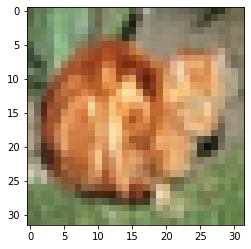

In [7]:
plt.imshow(single_image)

In [8]:
y_train[3]

array([4], dtype=uint8)

In [9]:
X_train.min()

0

In [10]:
X_train.max()

255

In [11]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [12]:
X_train_scaled = X_train_scaled.reshape(-1,32,32,3)
X_test_scaled = X_test_scaled.reshape(-1,32,32,3)

In [13]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [14]:
y_train_onehot.shape

(50000, 10)

In [15]:
y_test_onehot = utils.to_categorical(y_test,10)

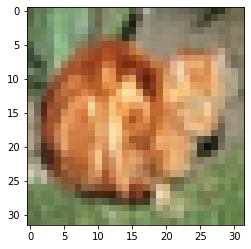

In [16]:
single_image = X_train[1100]
plt.imshow(single_image,cmap='gray')

In [17]:
model = keras.Sequential()
model.add(layers.Input(shape=(32,32,3)))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu', padding='same'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu', padding='same'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(256,activation="relu"))
model.add(layers.Dense(10,activation="softmax"))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 256)               5

In [19]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')

In [20]:
model.fit(X_train_scaled ,y_train_onehot, epochs=50,
          batch_size=100, 
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/50
500/500 [==============================] - 76s 148ms/step - loss: 1.4802 - accuracy: 0.4707 - val_loss: 1.2376 - val_accuracy: 0.5601
Epoch 2/50
500/500 [==============================] - 70s 139ms/step - loss: 1.1455 - accuracy: 0.5969 - val_loss: 1.0390 - val_accuracy: 0.6338
Epoch 3/50
500/500 [==============================] - 68s 136ms/step - loss: 0.9943 - accuracy: 0.6485 - val_loss: 0.9942 - val_accuracy: 0.6488
Epoch 4/50
500/500 [==============================] - 68s 136ms/step - loss: 0.8923 - accuracy: 0.6882 - val_loss: 0.9210 - val_accuracy: 0.6842
Epoch 5/50
500/500 [==============================] - 68s 136ms/step - loss: 0.8113 - accuracy: 0.7162 - val_loss: 0.8718 - val_accuracy: 0.6997
Epoch 6/50
500/500 [==============================] - 68s 136ms/step - loss: 0.7357 - accuracy: 0.7437 - val_loss: 0.8703 - val_accuracy: 0.7018
Epoch 7/50
500/500 [==============================] - 68s 135ms/step - loss: 0.6742 - accuracy: 0.7652 - val_loss: 0.8591 - val_ac

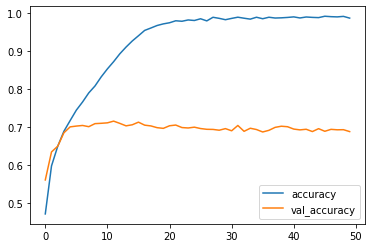

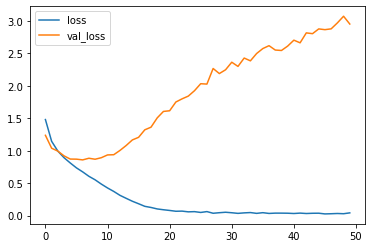

In [21]:
metrics = pd.DataFrame(model.history.history)
metrics[['accuracy','val_accuracy']].plot()
metrics[['loss','val_loss']].plot()

In [37]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

In [65]:
img = image.load_img('img3.jpg')

In [66]:
img = image.load_img('img3.jpg')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_32 = tf.image.resize(img_tensor,(32,32))
img_32_scaled = img_32.numpy()/255.0

In [67]:
x_single_prediction = np.argmax(
    model.predict(img_32_scaled.reshape(1,32,32,3)),
     axis=1)

In [68]:
img_32_scaled.shape

(32, 32, 3)

In [69]:
print(x_single_prediction)

[0]
